In [1]:
# Import necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
# Load the users_with_attributes dataframe
users_with_attributes = pd.read_pickle('pickle_dataframes/users_with_attributes.pkl')

In [3]:
# Display the dataframe
users_with_attributes

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,TotalActivity,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction
0,-1,1,2012-12-04 20:12:06.337,2012-12-04 20:12:06.337,267,5442,6725,881.0,1320.0,8879.0,11080.0,0.182188,0.013791,0.178233,0.085863,6.820658,7.738636,1.578669,135.0,0.102273
5,5,315,2012-12-04 20:36:06.517,2021-07-05 18:03:41.037,49,14,58,0.0,3.0,31.0,34.0,0.000000,0.000000,0.185433,0.469406,NaN,7.000000,1.193548,1.0,0.333333
8,8,2777,2012-12-04 20:52:37.450,2022-07-31 22:39:03.850,832,37,5,0.0,13.0,10.0,23.0,0.000000,0.000000,0.689277,0.049030,NaN,20.230769,1.500000,7.0,0.538462
18,18,5325,2012-12-04 21:37:27.683,2013-12-18 15:57:41.670,427,110,11,16.0,20.0,65.0,101.0,0.661300,0.212294,0.287115,0.189645,13.562500,13.700000,0.769231,10.0,0.500000
23,23,16227,2012-12-04 21:49:39.360,2015-02-14 02:38:09.917,1449,803,54,36.0,124.0,277.0,437.0,0.381967,0.141828,0.374322,0.199965,13.361111,7.782258,1.321300,44.0,0.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37644,46025,141,2023-03-19 12:16:59.447,2023-06-27 09:27:37.477,50,0,0,2.0,0.0,16.0,18.0,0.159400,0.000000,0.000000,-0.111800,-2.000000,NaN,0.000000,NaN,NaN
37863,46253,251,2023-04-07 18:35:35.903,2023-07-22 21:32:54.697,6,3,9,0.0,6.0,10.0,16.0,0.000000,0.000000,0.666883,-0.105290,NaN,1.833333,1.200000,NaN,NaN
38111,46524,448,2023-05-17 19:13:21.650,2023-08-19 21:16:59.250,100,37,31,8.0,0.0,15.0,23.0,0.181063,0.299013,0.000000,0.189967,2.250000,NaN,0.600000,NaN,NaN
38246,46665,597,2023-06-07 21:14:53.120,2023-08-17 09:54:23.023,3,0,0,2.0,6.0,11.0,19.0,0.620450,0.255300,-0.036367,0.034573,6.500000,5.333333,0.727273,2.0,0.333333


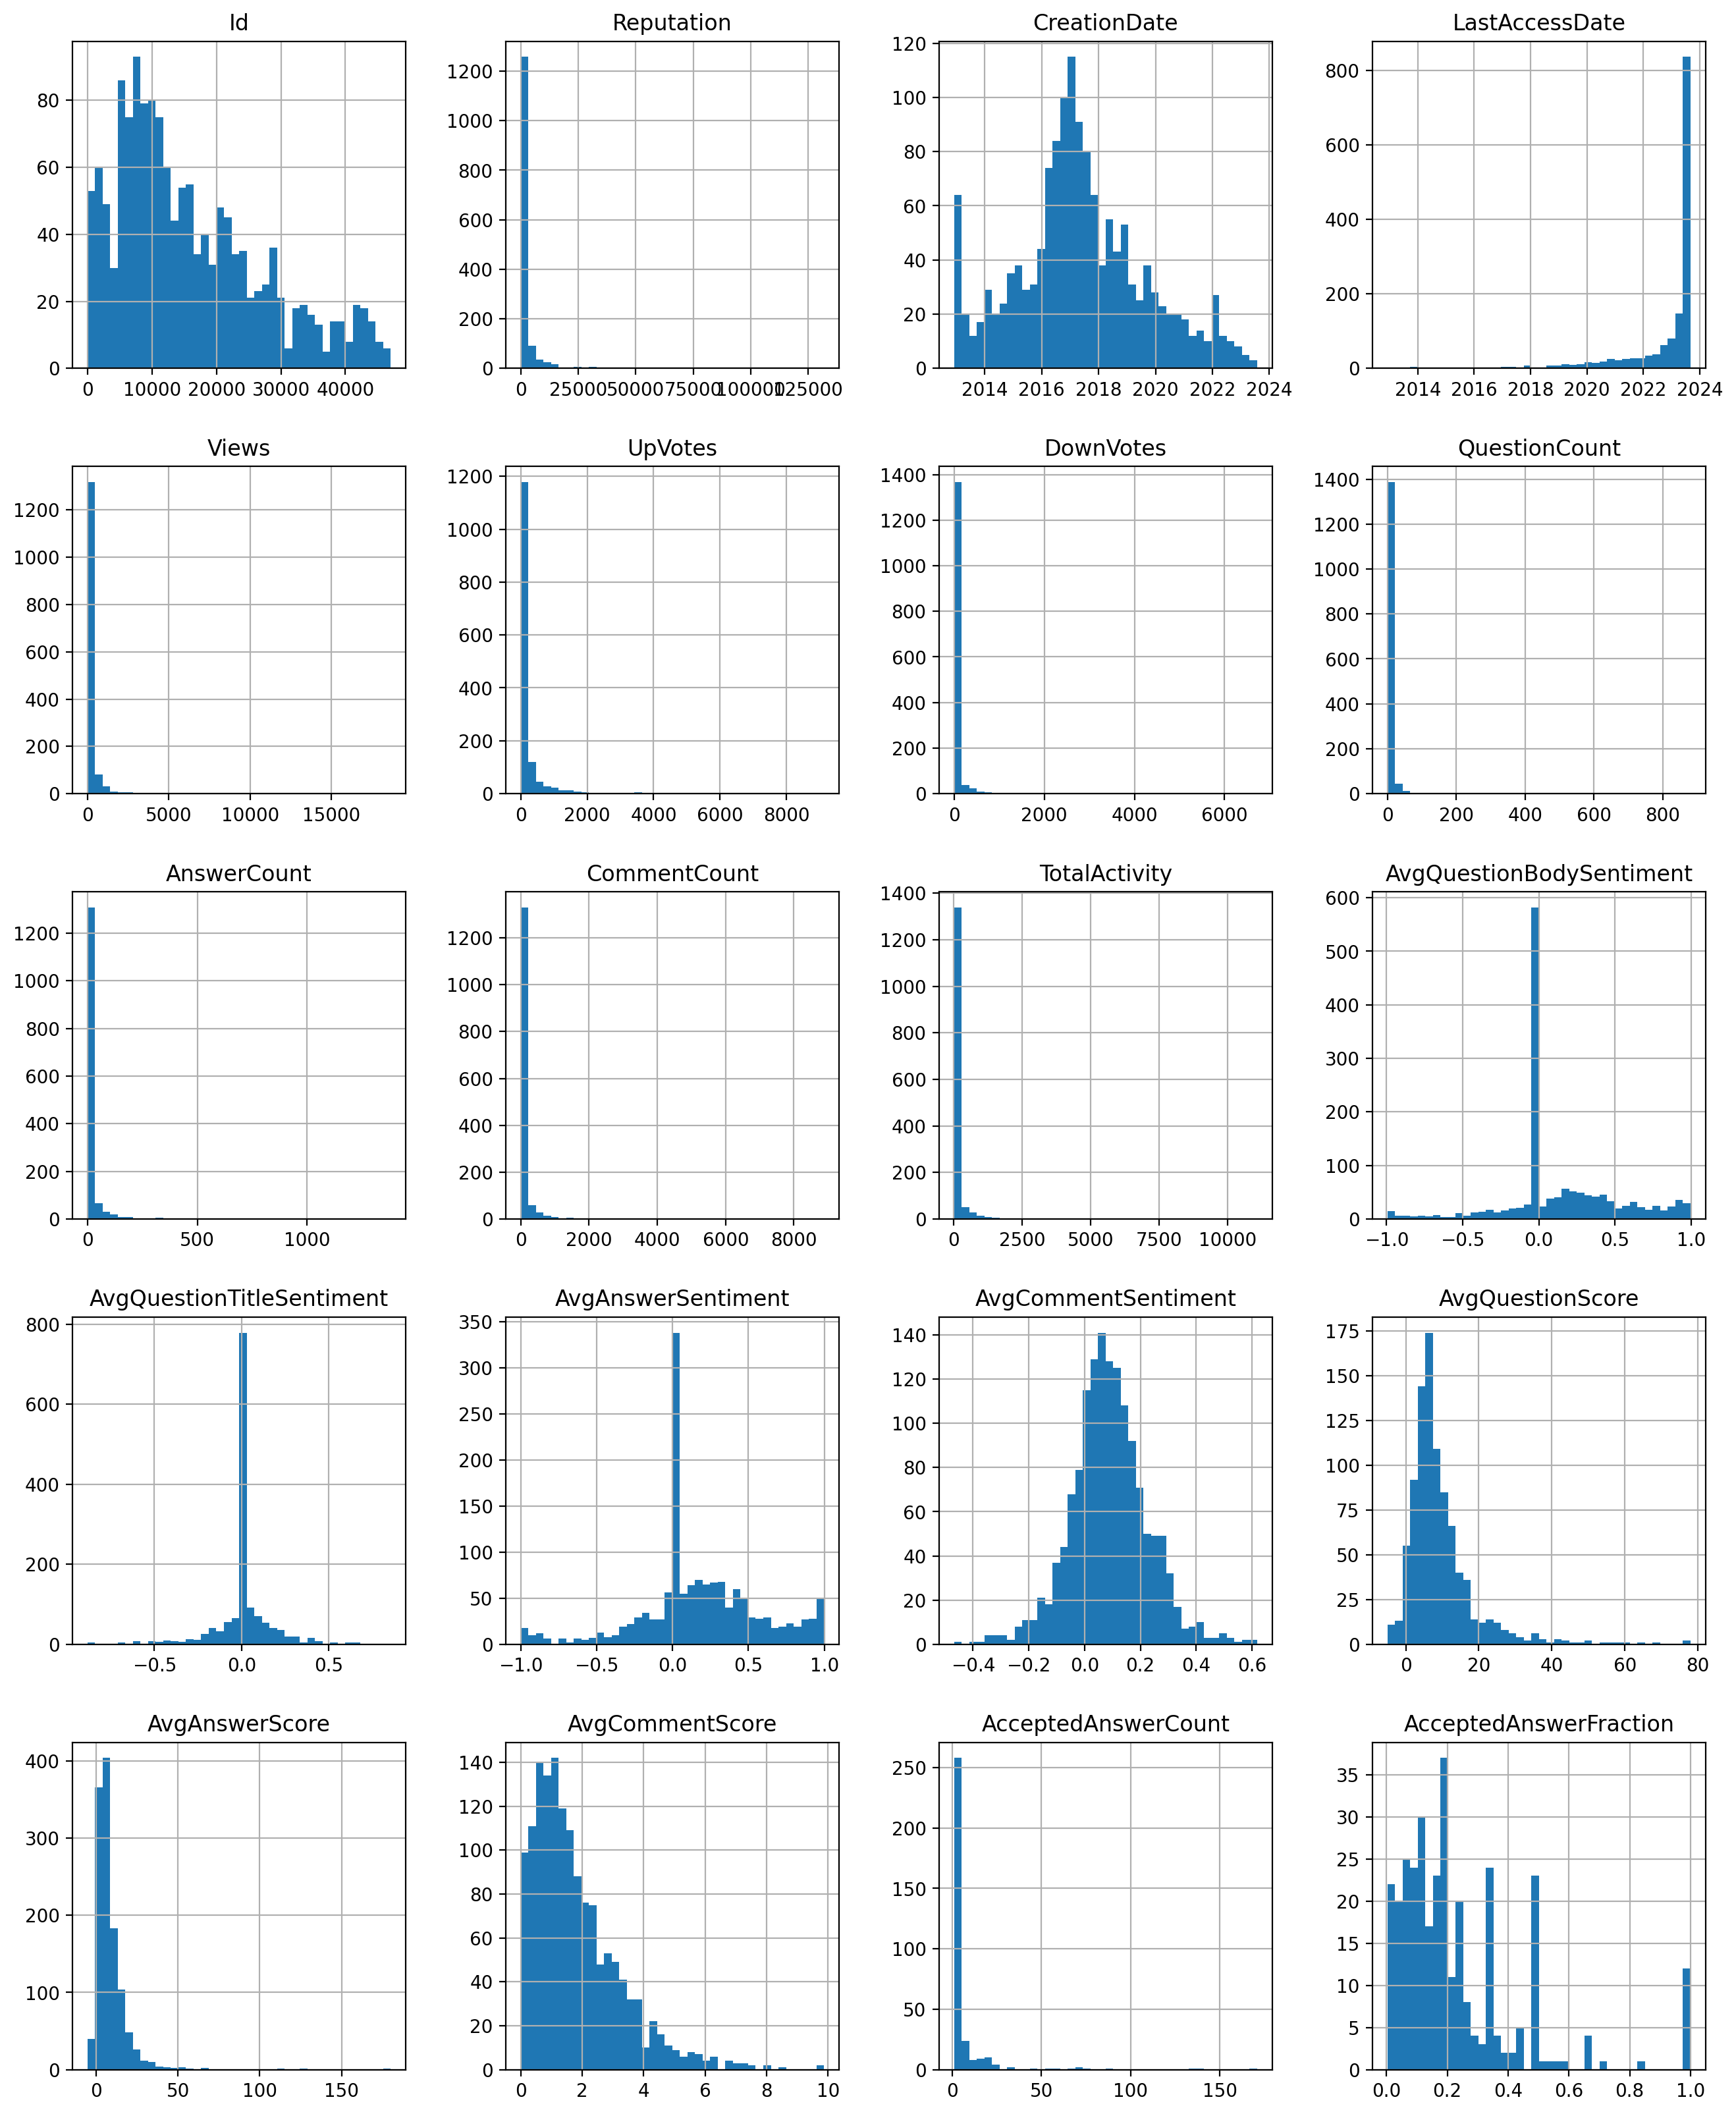

In [4]:
# Display a histogram of each column in the dataframe
users_with_attributes.hist(bins=40, figsize=(16, 20))

plt.show()

In [5]:
# Note: Set 'verbose' to True to display the Elbow Method and Silhouette Analysis plots
def custom_cluster(target_dataframe, clustering_features, n_clusters, cluster_label, verbose=False, random_state=42):
    # Impute NaN values with 0
    clustering_features_imputed = target_dataframe[clustering_features].fillna(0)

    # Scale features
    scaler = StandardScaler()
    scaled_clustering_features = scaler.fit_transform(clustering_features_imputed)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
    kmeans.fit(scaled_clustering_features)

    # Add cluster labels to dataframe
    target_dataframe[cluster_label] = kmeans.labels_

    if verbose == True:
        # Elbow method
        wcss = []
        
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
            kmeans.fit(scaled_clustering_features)
            wcss.append(kmeans.inertia_)
            
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        
        axs[0].plot(range(1, 11), wcss)
        axs[0].set_xlabel('Number of Clusters')
        axs[0].set_ylabel('Within-Cluster Sum of Squares')
        axs[0].grid(True)
        axs[0].set_title('Elbow Method')

        # Silhouette analysis
        silhouette_scores = []
        
        for i in range(2, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
            kmeans.fit(scaled_clustering_features)
            silhouette_avg = silhouette_score(scaled_clustering_features, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)

        axs[1].plot(range(2, 11), silhouette_scores)
        axs[1].set_xlabel('Number of Clusters')
        axs[1].set_ylabel('Silhouette Score')
        axs[1].grid(True)
        axs[1].set_title('Silhouette Analysis')

        plt.tight_layout()
        plt.show()

        # Display feature distributions between clusters
        plt.figure(figsize=(len(clustering_features)*4, 4))

        for i, feature in enumerate(clustering_features, 1):
            plt.subplot(1, len(clustering_features), i)
            sns.boxplot(x=cluster_label, y=feature, data=target_dataframe)

            plt.title(f'Distribution of {feature}')
            plt.xlabel('Cluster')
            plt.ylabel(feature)

        plt.tight_layout()
        plt.show()

        # Display cluster information
        cluster_counts = target_dataframe[cluster_label].value_counts().sort_index()
        cluster_stats = pd.DataFrame(target_dataframe.groupby(cluster_label)[clustering_features].mean().add_suffix('Mean')).reset_index(drop=True)
        
        cluster_info = pd.concat([cluster_counts, cluster_stats], axis=1)
        cluster_info.rename(columns={cluster_label: 'Count', 'count': 'Count'}, inplace=True)
        cluster_info.index.name = 'Cluster'
        
        print(cluster_info)

### 1. Clustering by Activity Metrics

#### 1.1 Clustering by question count, answer count, and comment count

In [6]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction'],
      dtype='object')

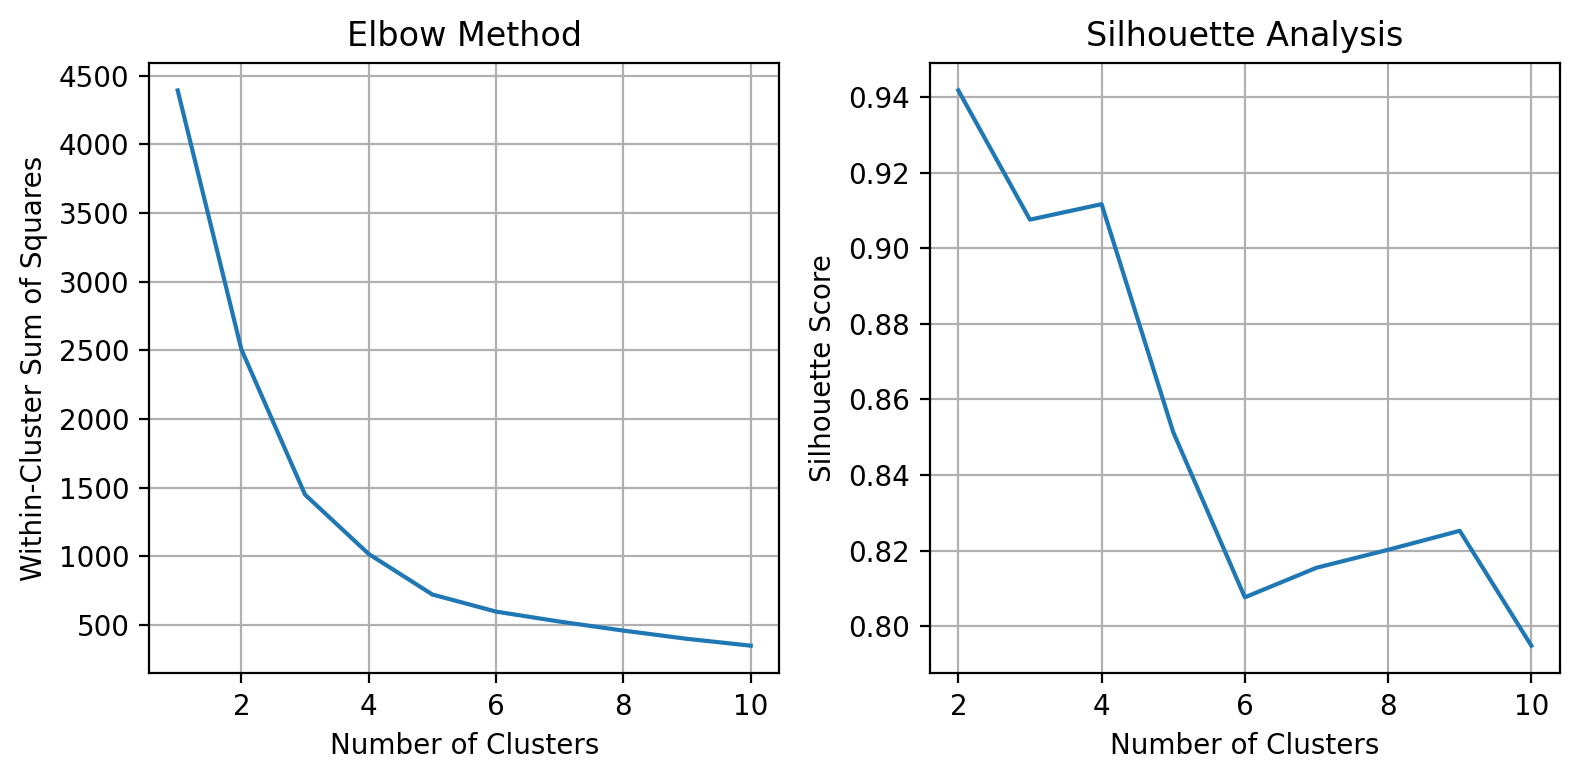

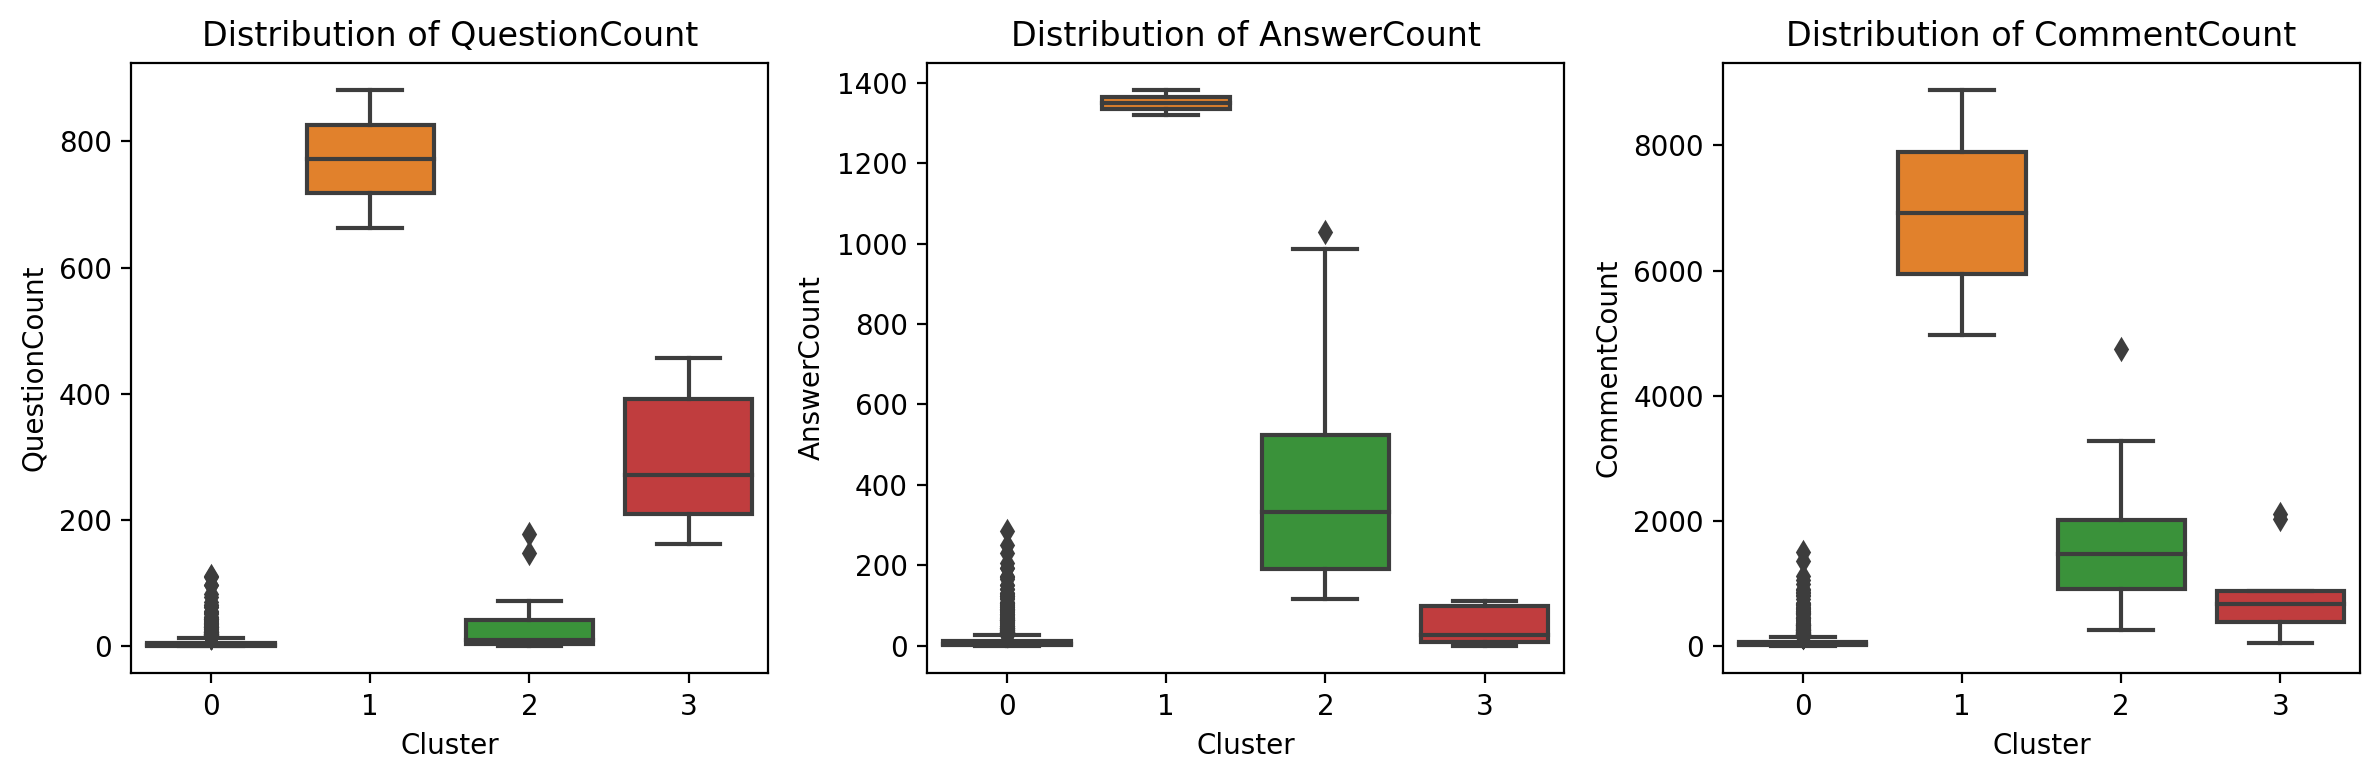

         Count  QuestionCountMean  AnswerCountMean  CommentCountMean
Cluster                                                             
0         1426           4.528050        12.411641         71.998597
1            2         772.000000      1350.500000       6925.500000
2           27          29.000000       399.925926       1592.962963
3            9         294.555556        52.666667        845.555556


In [7]:
clustering_features = ['QuestionCount', 'AnswerCount', 'CommentCount']

custom_cluster(users_with_attributes, clustering_features, 4, 'ActivityCluster', verbose=True)

### 2. Clustering by Quality Metrics

#### 2.1 Clustering by reputation, average question score, average answer score, and average comment score

In [8]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'ActivityCluster'],
      dtype='object')

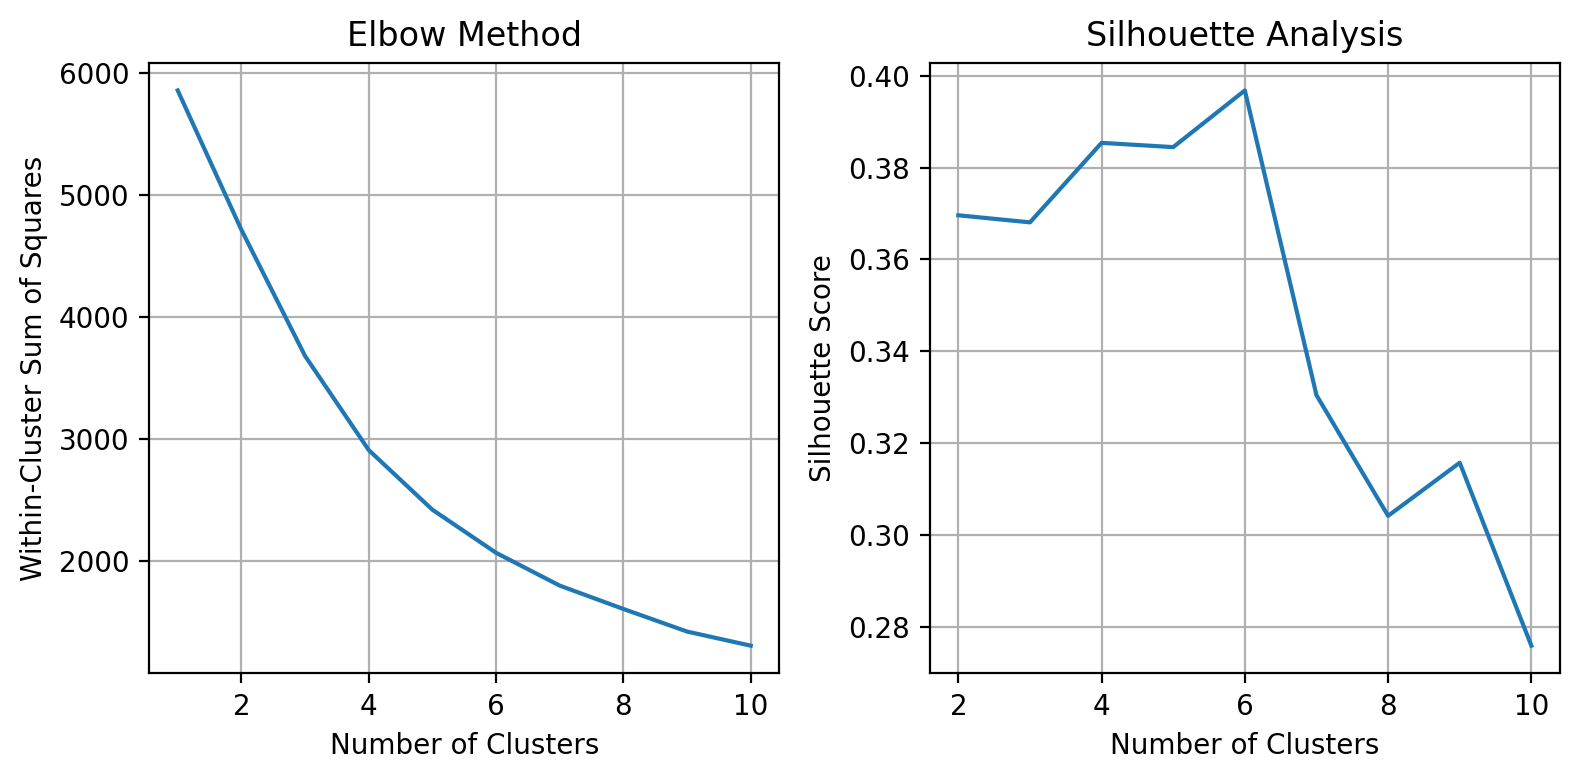

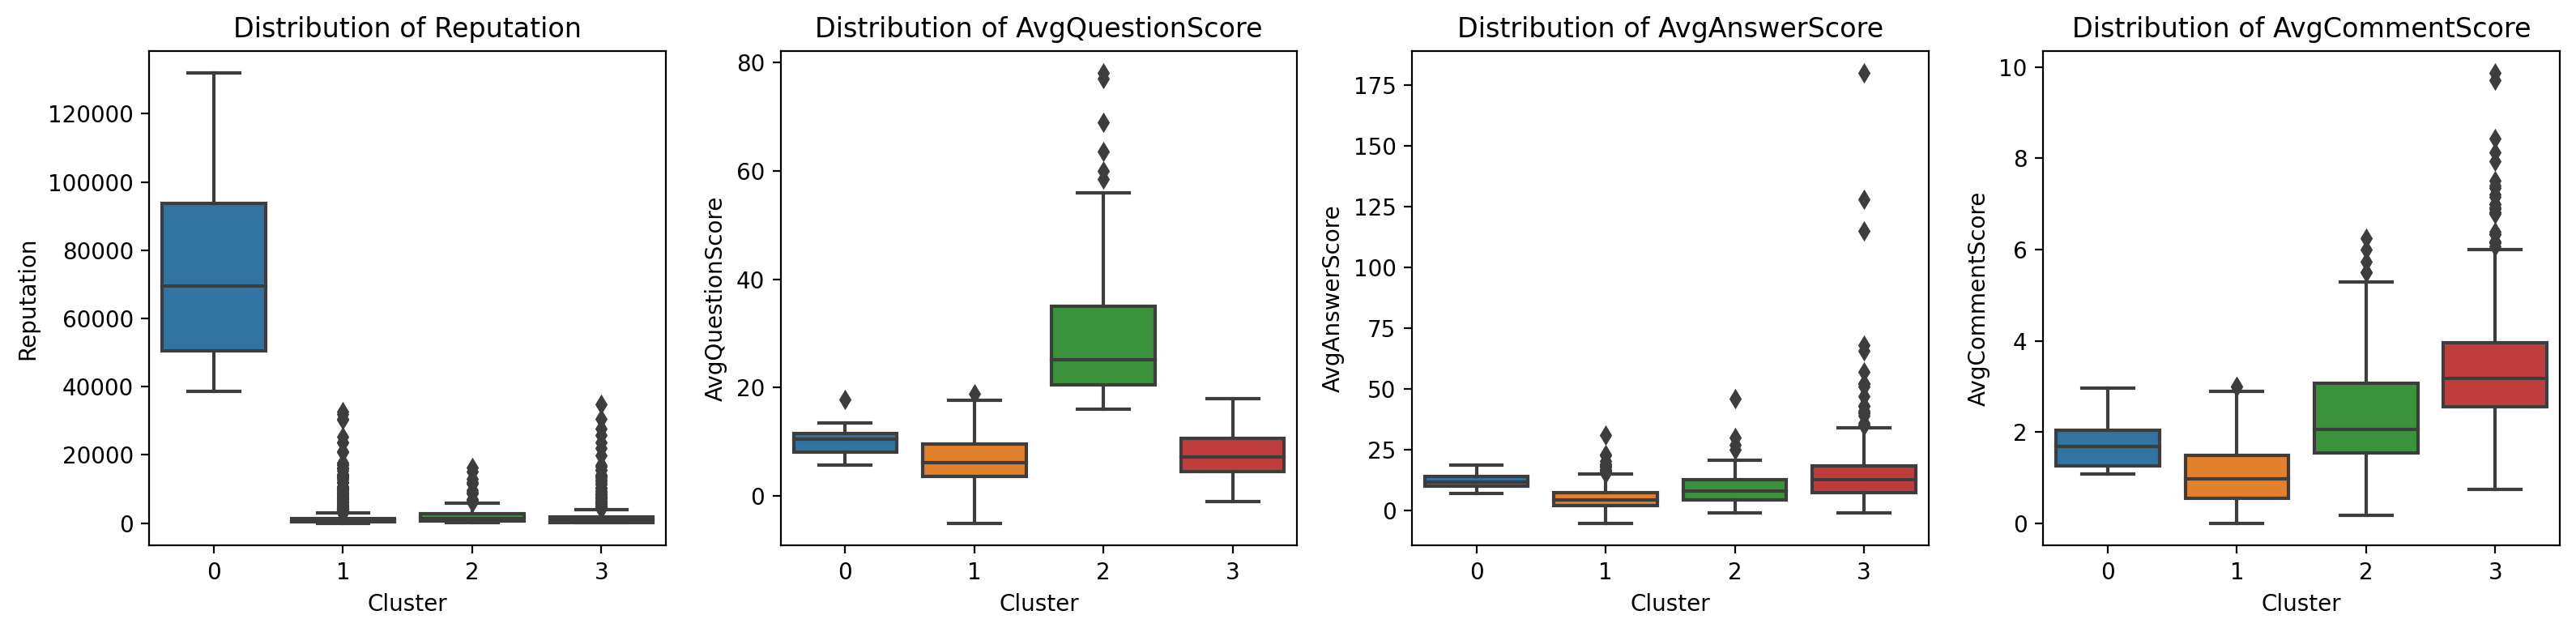

         Count  ReputationMean  AvgQuestionScoreMean  AvgAnswerScoreMean  \
Cluster                                                                    
0           16    74118.812500             10.385368           11.852085   
1          934     1710.002141              6.682945            4.981177   
2          105     2632.095238             29.546801            9.559383   
3          409     2223.853301              7.573918           15.665143   

         AvgCommentScoreMean  
Cluster                       
0                   1.729446  
1                   1.043005  
2                   2.368631  
3                   3.436663  


In [9]:
clustering_features = ['Reputation', 'AvgQuestionScore', 'AvgAnswerScore', 'AvgCommentScore']

custom_cluster(users_with_attributes, clustering_features, 4, 'Quality1Cluster', verbose=True)

#### 2.2 Clustering by accepted answer count and accepted answer fraction

In [10]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'ActivityCluster', 'Quality1Cluster'],
      dtype='object')

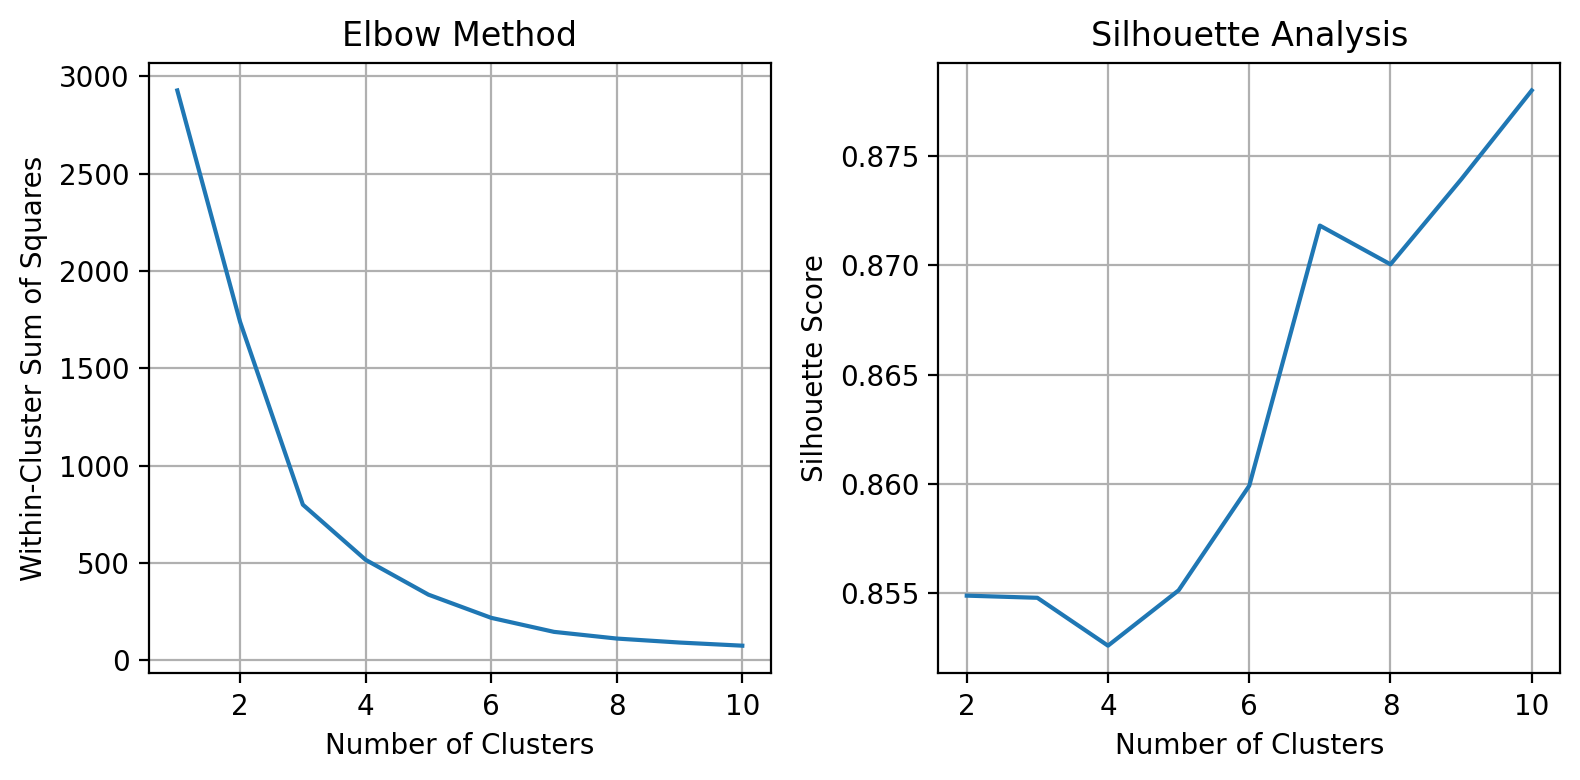

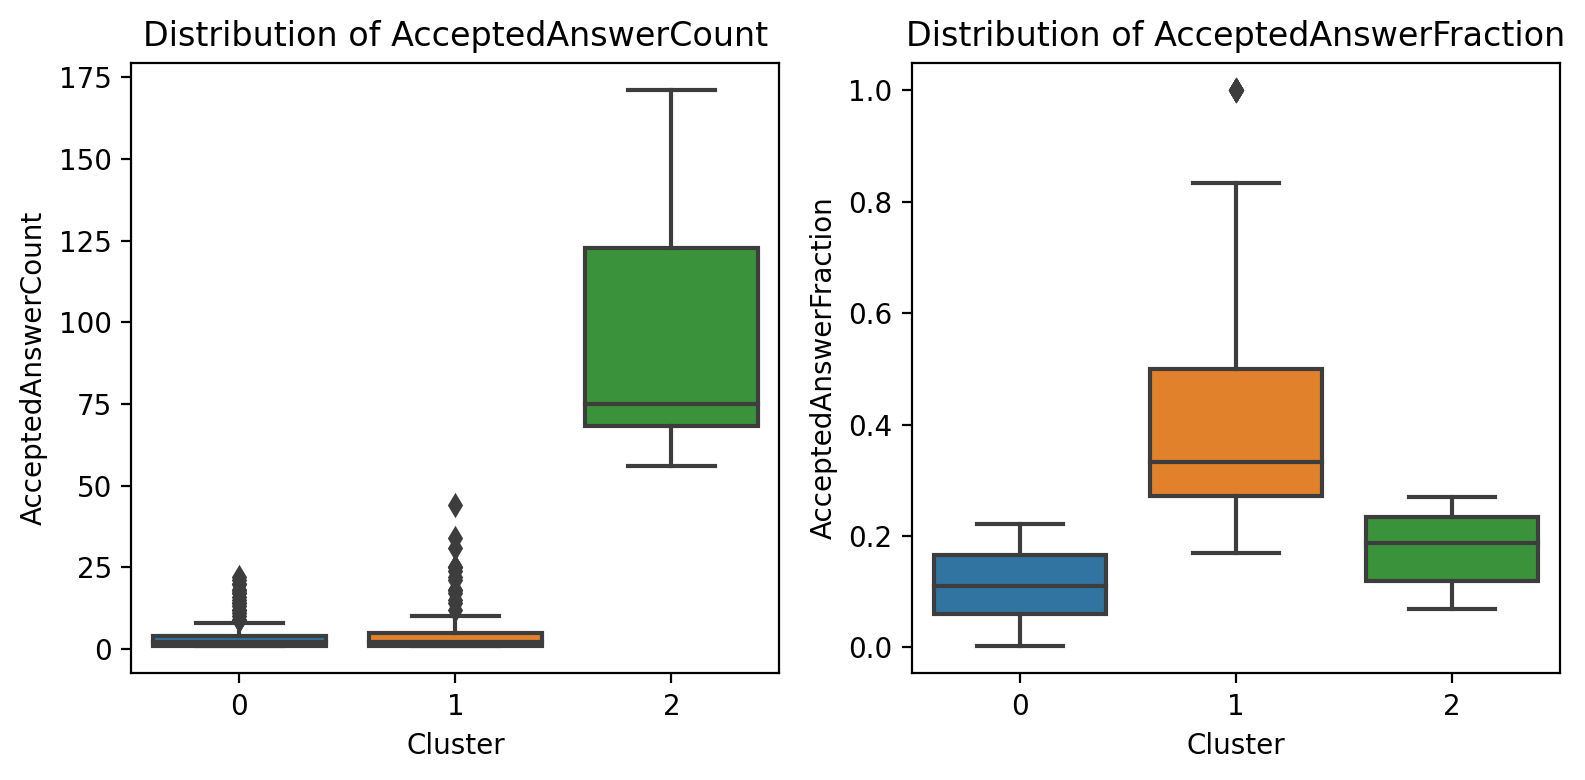

         Count  AcceptedAnswerCountMean  AcceptedAnswerFractionMean
Cluster                                                            
0         1334                 3.505102                    0.112406
1          120                 5.166667                    0.440166
2           10                93.500000                    0.178602


In [11]:
clustering_features = ['AcceptedAnswerCount', 'AcceptedAnswerFraction']

custom_cluster(users_with_attributes, clustering_features, 3, 'Quality2Cluster', verbose=True)

### 3. Clustering by Sentiment Metrics

#### 3.1 Clustering by average question body sentiment, average question title sentiment, average answer sentiment, average comment sentiment

In [12]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'ActivityCluster', 'Quality1Cluster', 'Quality2Cluster'],
      dtype='object')

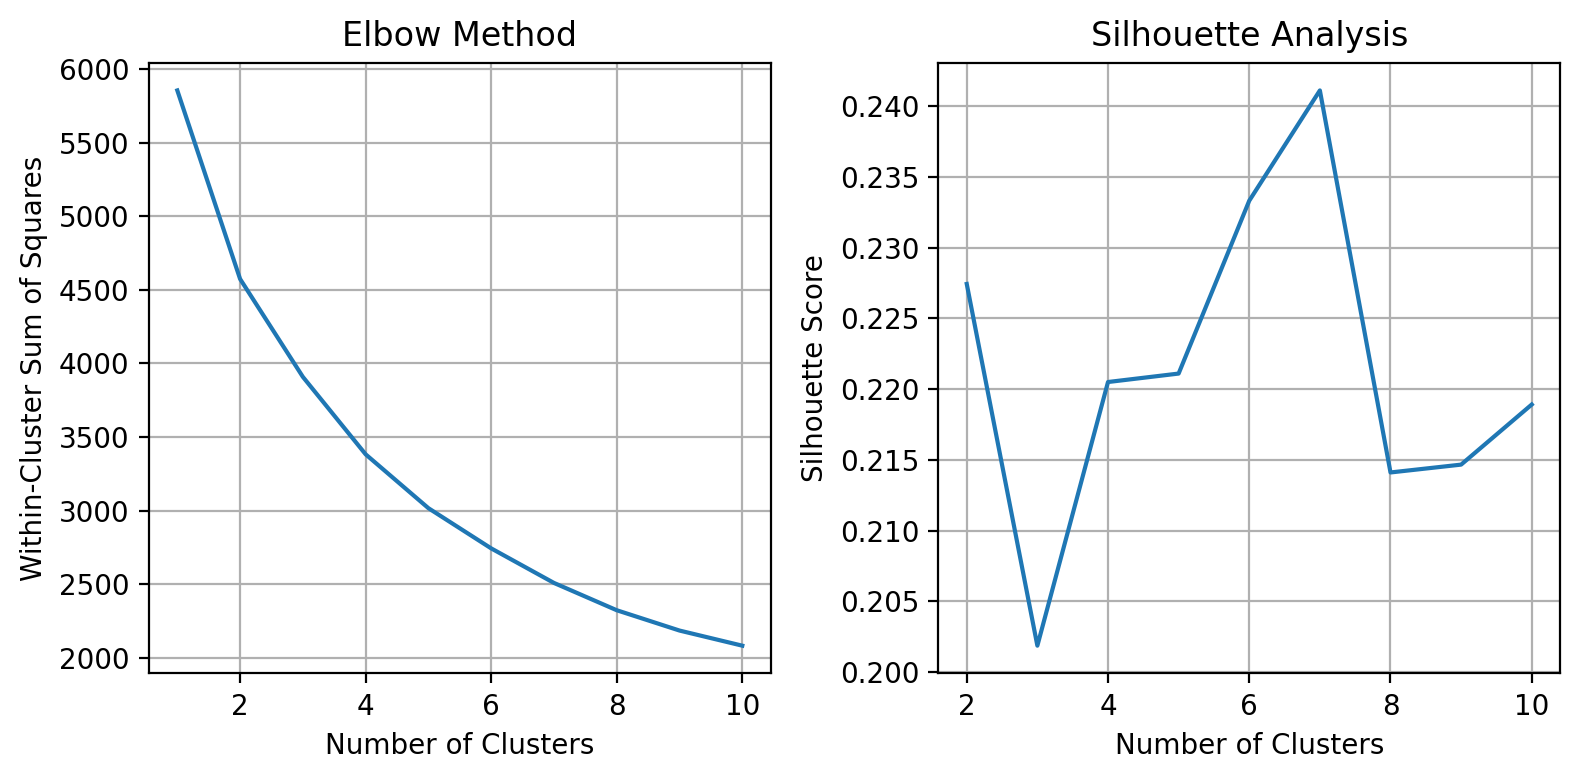

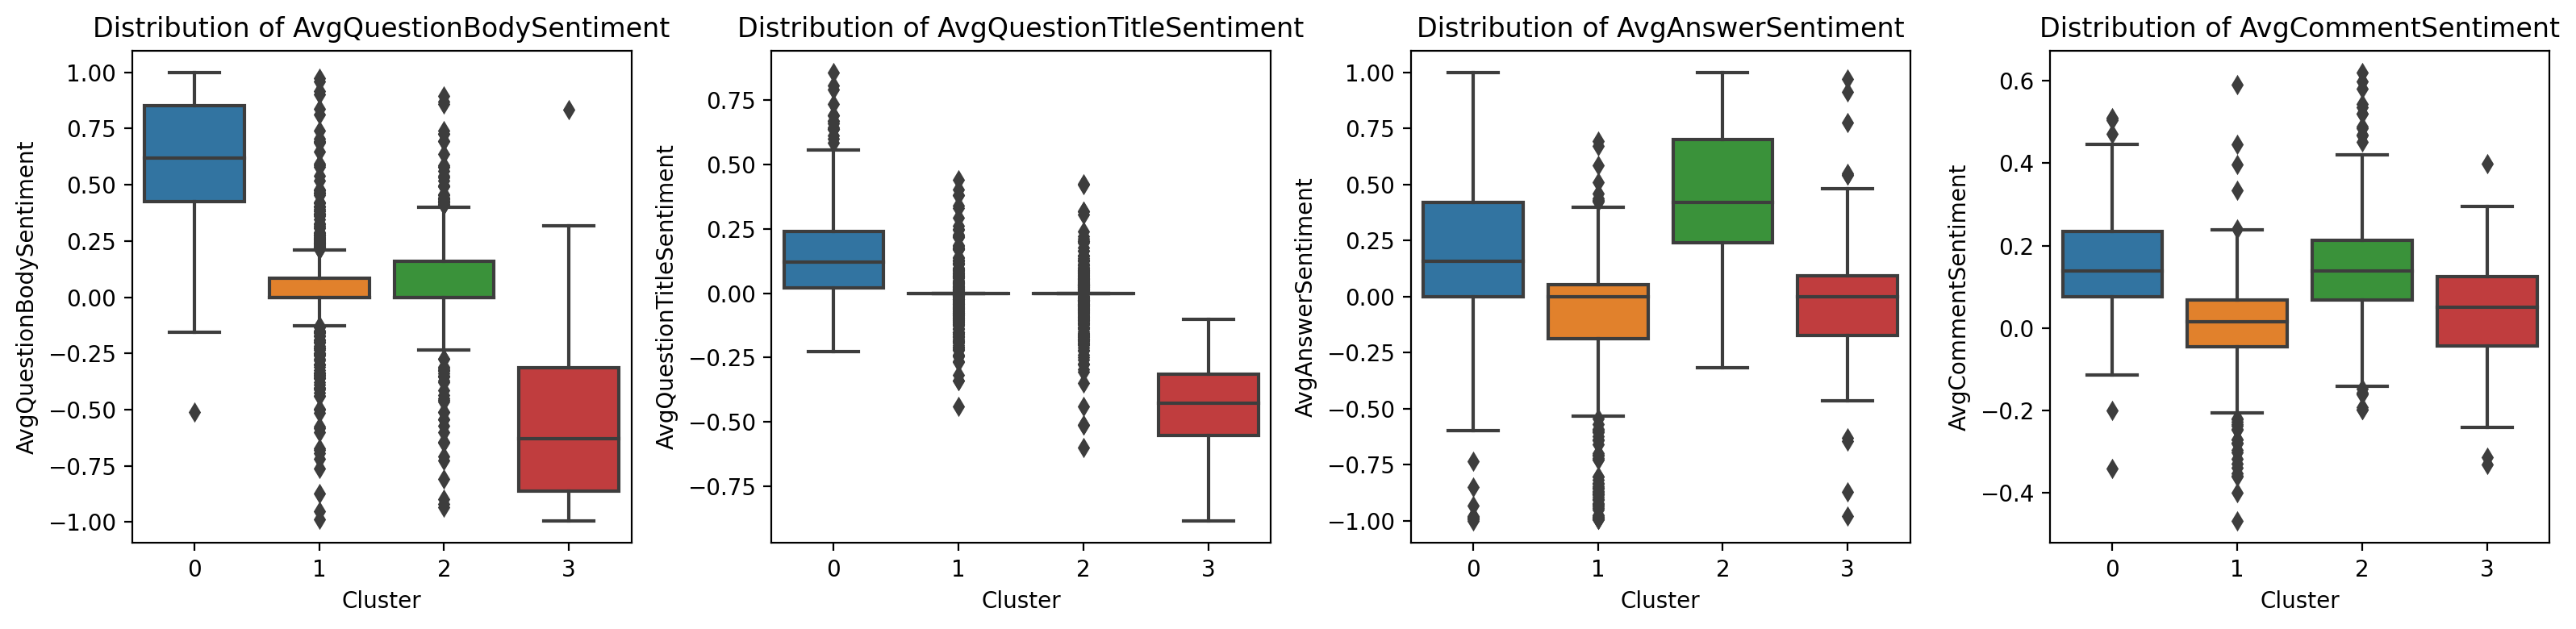

         Count  AvgQuestionBodySentimentMean  AvgQuestionTitleSentimentMean  \
Cluster                                                                       
0          319                      0.626951                       0.164018   
1          555                      0.031798                      -0.005078   
2          520                      0.055404                      -0.008351   
3           70                     -0.546127                      -0.444112   

         AvgAnswerSentimentMean  AvgCommentSentimentMean  
Cluster                                                   
0                      0.192263                 0.152681  
1                     -0.090902                 0.005322  
2                      0.454261                 0.144078  
3                      0.005493                 0.037914  


In [13]:
clustering_features = ['AvgQuestionBodySentiment', 'AvgQuestionTitleSentiment', 'AvgAnswerSentiment', 'AvgCommentSentiment']

custom_cluster(users_with_attributes, clustering_features, 4, 'SentimentCluster', verbose=True)

### 4. Clustering by Engagement Metrics

#### 4.1 Clustering by views, upvotes, and downvotes

In [14]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'ActivityCluster', 'Quality1Cluster', 'Quality2Cluster',
       'SentimentCluster'],
      dtype='object')

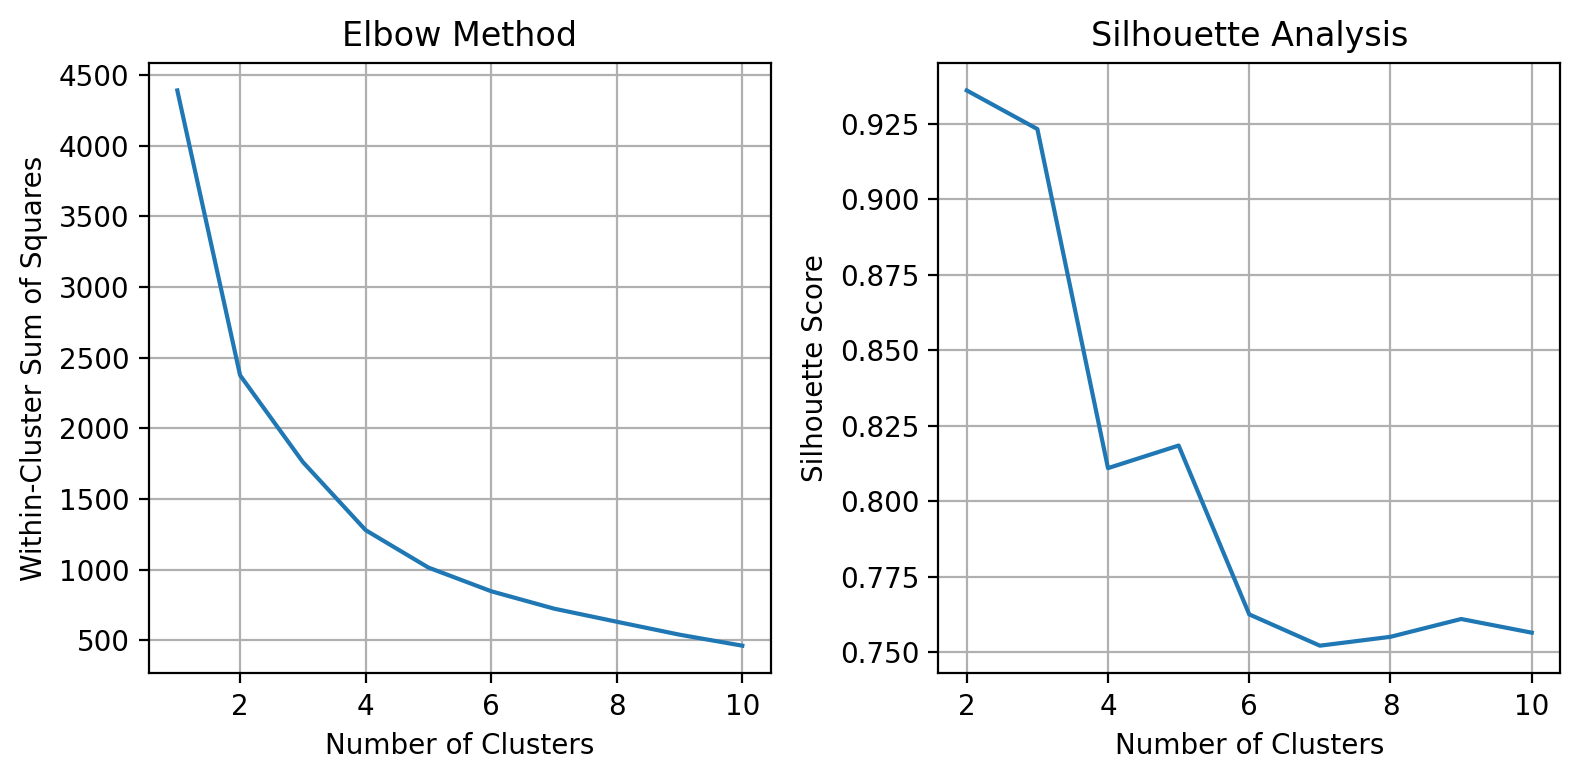

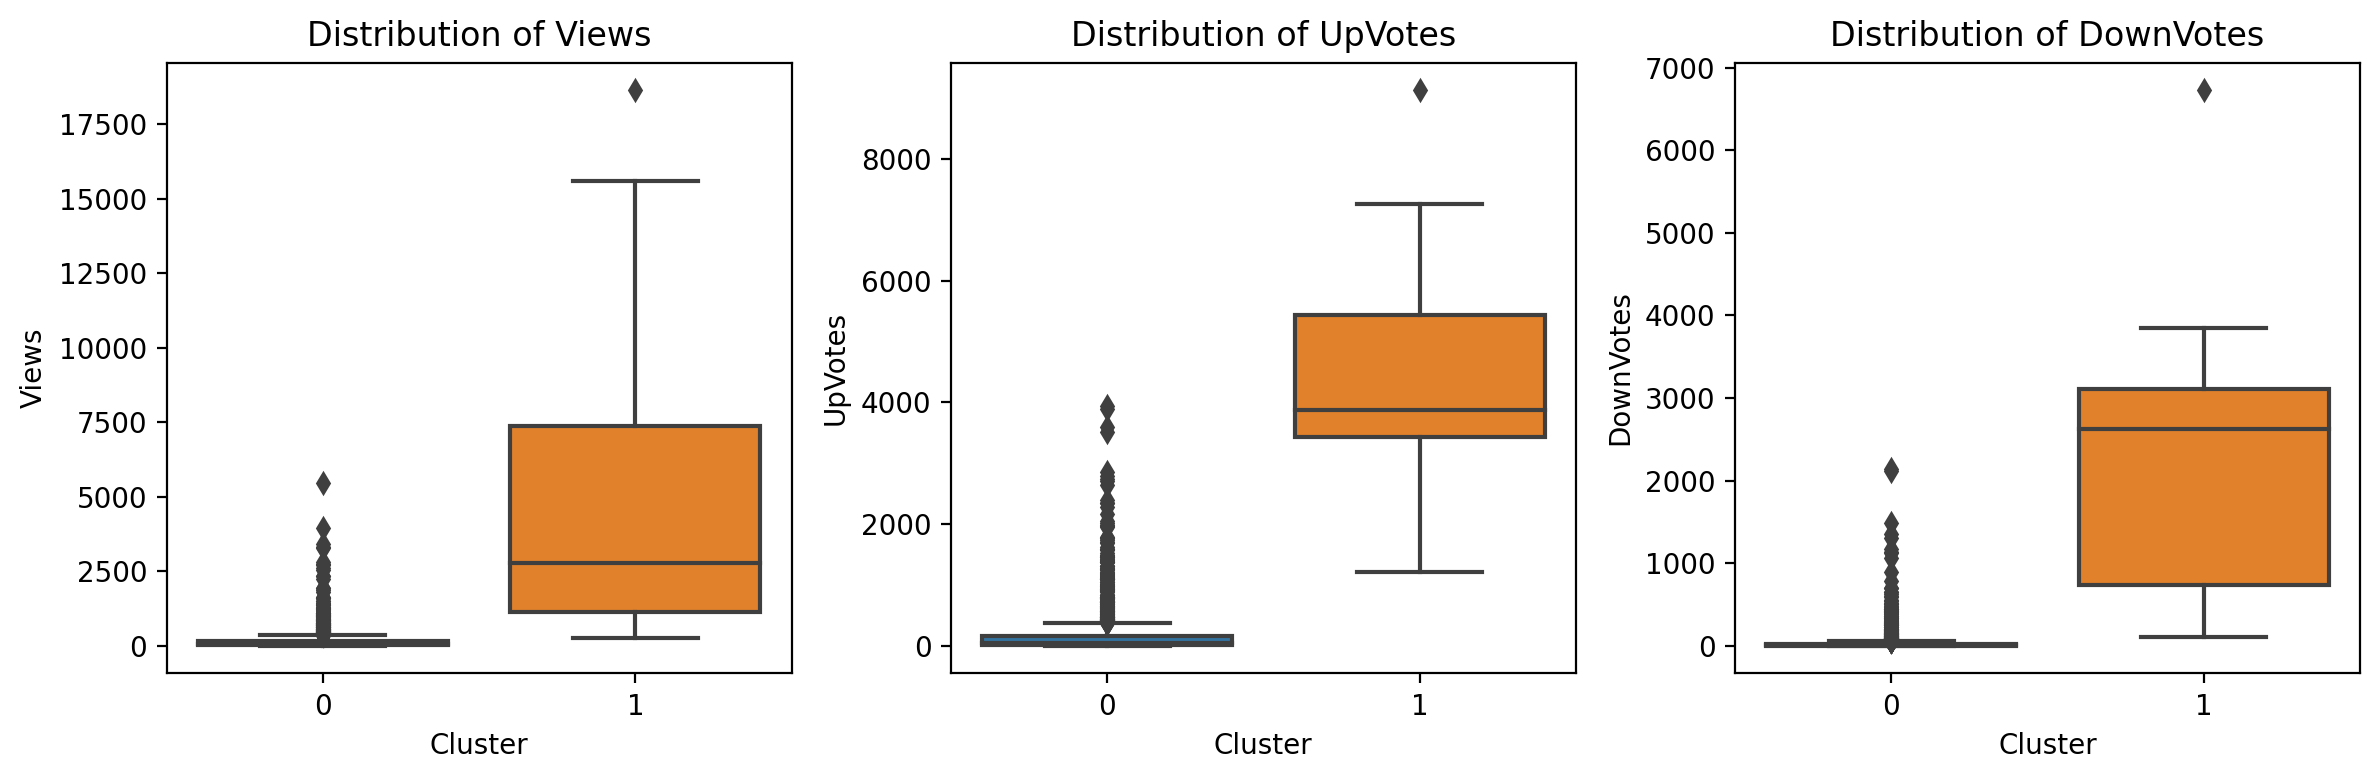

         Count    ViewsMean  UpVotesMean  DownVotesMean
Cluster                                                
0         1447   174.595715   187.512785      41.205252
1           17  5395.882353  4345.411765    2221.117647


In [15]:
clustering_features = ['Views', 'UpVotes', 'DownVotes']

custom_cluster(users_with_attributes, clustering_features, 2, 'EngagementCluster', verbose=True)